## THIS IS THE SENTIMENT ANALYSIS MODELS CREATED ON MOVIE REVIEWS.MODELS CAN BE USED FOR PRODUCT DESIGNS, SENTIMENT RATING INFLUENCE AND NEXT MOVIE PRODUCTION. 

## TWO DIFFERENT ANALYSIS WERE DONE

## Supervised machine learning algorithms
* Logistic regreesion
* Multinomial Naive Bayes

## Deep learning algorithms
* Convolutional Neural Networks
* Long-term-short memory

## link to data 
* for deep learning 
* https://raw.githubusercontent.com/jbrownlee/Datasets/master/review_polarity.tar.gz

In [1]:
# few more installations of libraries

#Install some libraries
#pip install --upgrade keras
#!pip install  WordCloud
#nltk.download("punkt")

## Import neccessary library

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

from bs4 import BeautifulSoup
#import spacy
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import os
import warnings
import re, string, unicodedata
 
warnings.filterwarnings(action = 'ignore')

## Load the data and view

In [203]:
my_df = pd.read_csv('C:/Users/ThinkPad/Documents/Assessments/NLP/txt_sentoken\/my_movie_review.csv')
my_df.head()

,reviews,sentiment
0,claire danes and omar epps deliver their lines...,negative
1,he spins and darts across the screen like sand...,positive
2,i rate ghosts of mars a 4 on the 0 to 10 scale...,negative
3,the island is shaken up by several vicious gre...,positive
4,"however , most outstanding is the gnarled perf...",positive


## Descriptive statistics of the data

In [204]:
my_df.describe()

,reviews,sentiment
count,300,300
unique,300,2
top,claire danes and omar epps deliver their lines...,negative
freq,1,150


In [205]:
# Unique values of the sentiment

my_df['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [206]:
# reset index and plot the unique values to see their proportion in data used

index_count = my_df['sentiment'].value_counts()
index = index_count.reset_index()
index.columns = ['sentiment','count']
index

,sentiment,count
0,negative,150
1,positive,150


## visusalization showing proportion of unique values of sentiment

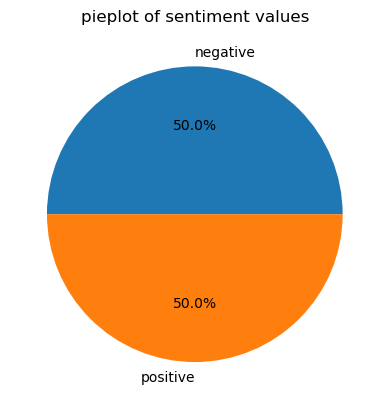

In [207]:
plt.title("pieplot of sentiment values", loc = "center")
plt.pie(index["count"],labels= index["sentiment"],autopct="%1.1f%%")
plt.show()

# pie chart shows equal sentiments review
# initially, i used unequal sentiments
* positive sentiment has 57% 
* negative sentiments has 42.6% 

## check most frequent words before cleaning

 there are: 300 sentences
[('...', 11), ('the', 10), (',', 5), ('of', 3), ('a', 3), ('is', 3), (':', 3), ('0', 2), ('and', 2), ('like', 2)]


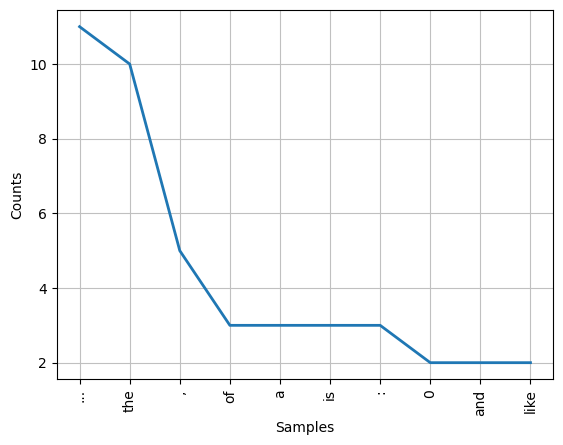

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [208]:
tokenizer=ToktokTokenizer()
toks =tokenizer.tokenize(my_df['reviews'])
from nltk.probability import FreqDist
freq_dist= FreqDist(toks)
print(f' there are:', len(my_df['reviews']), 'sentences')
print(freq_dist.most_common(10))
freq_dist.plot(10)

* mostly punctuations and articles

In [209]:
#my_df['reviews'].unique()

## pre-processing and normalization

In [210]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
my_df['reviews']=my_df['reviews'].apply(denoise_text)

In [211]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

my_df['reviews'] = my_df['reviews'].apply(remove_special_characters)

## stemming

In [212]:
#Stemming the text, reducing the wrods to their root meaning

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column

my_df['reviews']= my_df['reviews'].apply(simple_stemmer)

In [214]:
#Tokenization of text

tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#print(stopword_list)

In [215]:
print(tokenizer.tokenize(my_df['reviews']))

['0', 'clair', 'dane', 'and', 'omar', 'epp', 'deliv', 'their', 'line', 'as', 'if', '...', '1', 'he', 'spin', 'and', 'dart', 'across', 'the', 'screen', 'like', 'sander', '...', '2', 'i', 'rate', 'ghost', 'of', 'mar', 'a', '4', 'on', 'the', '0', 'to', '10', 'scale', 'a', '...', '3', 'the', 'island', 'is', 'shaken', 'up', 'by', 'sever', 'viciou', 'great', '...', '4', 'howev', 'most', 'outstand', 'is', 'the', 'gnarl', 'perform', 'by', 'ro', '...', '...', '295', 'it', 'is', 'like', 'ten', 'movi', 'all', 'roll', 'into', 'one', 'and', 'it', 'n', '...', '296', 'even', 'so', 'the', 'strength', 'of', '_election_', 'reli', 'upon', 'i', '...', '297', 'the', 'rest', 'of', 'the', 'stori', 'isnt', 'import', 'becaus', 'all', 'i', '...', '298', 'doe', 'she', 'just', 'leav', 'the', 'toolbox', 'at', 'the', 'door', 'when', '...', '299', 'jump', 'back', 'a', 'few', 'year', 'to', 'a', 'meet', 'among', 'the', 'black', '...', 'Name', ':', 'reviews', ',', 'Length', ':', '300', ',', 'dtype', ':', 'object']


## English stopwords

In [216]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
my_df['reviews']=my_df['reviews'].apply(remove_stopwords)

{'through', 'how', 'all', 'only', 'no', "aren't", 'is', 'ain', "didn't", 'her', 'themselves', 't', "mightn't", 'hasn', 'he', "doesn't", 'herself', 'can', 'against', "she's", 'why', 'aren', 'other', 'so', 'mightn', 'do', 'then', 'be', "won't", 'are', 'own', 'who', 'wouldn', 'has', 'hadn', 'their', 'our', 'any', 'yourself', 'out', 'yourselves', 'not', 'the', 'were', "you'd", 'after', 'in', 'such', 'will', 'mustn', "shan't", 'as', 'his', 'if', 'by', 'which', 'most', 'each', 'shan', 'we', 'because', 'both', 'hers', 'down', 'now', 'nor', 'up', 'again', 'didn', 'during', 'theirs', 'once', 'to', 'had', 'doing', "you'll", 'isn', "wouldn't", 'between', "mustn't", 're', "haven't", 'did', 'was', 'but', 'o', "it's", "hadn't", 'more', 'same', 'and', 'shouldn', 'there', 'couldn', 've', 'been', "should've", 'wasn', 'an', 'don', 'yours', 's', 'have', 'your', 'under', 'its', 'ourselves', 'am', "isn't", 'ma', 'or', 'below', "don't", 'm', 'won', 'about', "you've", 'few', 'this', "wasn't", 'here', 'very',

## visualize most common words after cleaning 

In [217]:
#tokenize the sentences of the sentiments

token =tokenizer.tokenize(my_df['reviews'])
#token

## plot the most frequent words

 there are: 300 sentences
[('0', 3), (':', 3), ('like', 2), ('back', 2), ('scale', 2), ('movi', 2), ('one', 2), ('doe', 2)]


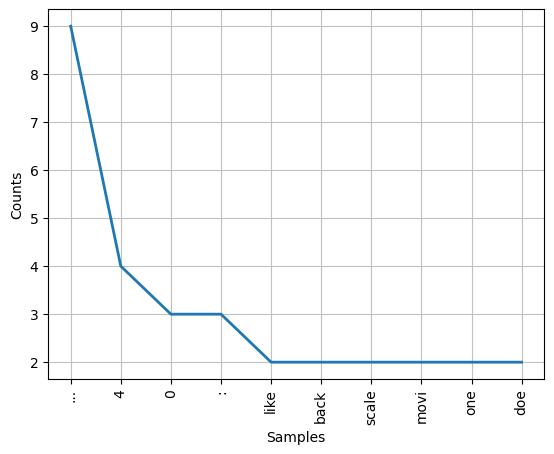

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [218]:
from nltk.probability import FreqDist
freq_dist= FreqDist(token)
print(f' there are:', len(my_df['reviews']), 'sentences')
print(freq_dist.most_common(10)[2:10])
freq_dist.plot(10)

* no more punctuations and articles.
* '...' and '46' also showed because of the format of data
* it doesnt mean there are numbers in the data.

In [220]:
# sample the words to reshuffle 
#my_df = my_df.sample(frac = 1)

In [356]:
#my_df.head(10)

## splitting the dataset

## training data takes 80%
## testing data takes 20%

In [255]:
#train dataset
train_reviews=my_df.reviews[:240]
train_sentiments=my_df.sentiment[:240]


#test dataset
test_reviews=my_df.reviews[240:]
test_sentiments=my_df.sentiment[240:]


print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(240,) (240,)
(60,) (60,)


## NORMALIZING TRAIN DATA

In [256]:
#normalized train reviews
norm_train_reviews=my_df.reviews[:160]
norm_train_reviews
#convert dataframe to string
norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
norm_train_spelling=TextBlob(norm_train_string)
# norm_train_spelling
norm_train_spelling.correct()
#Tokenization using Textblob
norm_train_words=norm_train_spelling.words
print(norm_train_words)

['0', 'clair', 'dane', 'omar', 'epp', 'deliv', 'line', 'bore', 'realli', 'tra', '1', 'spin', 'dart', 'across', 'screen', 'like', 'sander', 'cut', 'back', 'd', '2', 'rate', 'ghost', 'mar', '4', '0', '10', 'scale', '0', '4', '4', 'scale', '3', 'island', 'shaken', 'sever', 'viciou', 'great', 'white', 'shark', 'a', '4', 'howev', 'outstand', 'gnarl', 'perform', 'robert', 'shaw', 'movi', '5', 'hi', 'tale', 'float', 'water', 'week', '1', '000', 'men', 'swarm', 'shark', '6', 'whatev', 'skip', '7', 'nfl', 'thi', 'lead', 'team', 'like', 'detroit', 'lion', 'boast', 'supe', '8', 'interspers', 'throughout', 'open', 'credit', 'instanc', 'seri', '9', 'john', 'carpent', 'repris', 'mani', 'idea', 'hi', 'previou', 'film', '10', 'mod', 'squad', 'certainli', 'slick', 'look', 'product', 'complet', '11', 'dreyfuss', 'previous', 'seen', 'american', 'graffiti', '1973', '12', 'anybodi', 'know', 'thi', 'film', 'exist', 'week', 'befor', 'open', '13', 'biggest', 'kudo', 'go', 'sagemil', 'hold', 'throughout', 'ent

In [357]:
print(len(norm_train_words))

1298


## NORMALIZING TEST DATA

In [260]:
#Normalized test reviews
norm_test_reviews=my_df.reviews[160:]
norm_test_reviews
##convert dataframe to string
norm_test_string=norm_test_reviews.to_string()
# spelling correction using Textblob
norm_test_spelling=TextBlob(norm_test_string)
norm_test_spelling.correct()
#Tokenization using Textblob
norm_test_words=norm_test_spelling.words
print(norm_test_words)
#len(norm_test_words)


['160', 'first', 'summer', 'know', 'mayor', 'vaughn', 'warn', '161', 'stalk', 'waver', 'slightli', 'norm', 'one', 'respect', 'psycho', 'n', '162', 'elect', 'good', 'film', 'doe', 'live', 'hype', '163', 'tri', 'door', 'open', 'wander', 'around', 'hous', '164', '165', 'base', 'late', '1960', 'televis', 'show', 'name', 'mod', 'squad', 'tel', '166', 'toward', 'end', 'exampl', 'brook', 'ha', 'suspicion', 'daryl', '167', 'although', 'grand', 'new', 'technolog', 'exist', 'make', 'techni', '168', 'get', 'sever', 'bee', 'sting', '169', 'happen', '170', 'actor', 'pretti', 'good', 'part', 'although', 'bentley', 'seem', 'p', '171', 'plot', 'decept', 'simpl', '172', 'thi', 'leav', '75', 'cent', 'pay', 'thing', 'like', 'director', 'chan', '173', 'jacki', 'sent', 'un', 'retriev', 'cach', 'lost', 'nazi', 'gold', 'nort', '174', 'hell', 'end', 'whistl', 'stonecutt', 'song', 'simpson', 'day', 'hol', '175', 'like', 'get', 'kick', 'work', 'halloween', 'h20', '176', 'stalk', 'anoth', 'redund', 'entri', 'doo

In [261]:
len(norm_test_words)

1177

## remove the numbers from the tokenized sentences

In [ ]:
# df_train_reviews = [word for word in norm_train_words if word.isalpha()]
# print(df_train_reviews)
# print(len(df_train_reviews))

In [229]:
# df_test_reviews = [word for word in norm_test_words if word.isalpha()]
# print(df_test_reviews)
# print(len(df_test_reviews))

## Bags of words(bow)  
* to vectorize the data

In [262]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
vocab=cv.get_feature_names()
#print(vocab) #-toget feature names

BOW_cv_train: (160, 4260)
BOW_cv_test: (140, 4260)


## Term Frequency-Inverse Document Frequency model (tfidf)

**It is used to convert text documents to matrix of tfidf features.

In [263]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (160, 4260)
Tfidf_test: (140, 4260)


## Labeling the sentiment text
* class sklearn.preprocessing.LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
* this is only for binary classification labels. multiclass labels have to use one-vs-all scheme

In [264]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(my_df['sentiment'])
print(sentiment_data.shape)

(300, 1)


## split the sentiment data

In [266]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:160]
test_sentiments=sentiment_data[160:]
#print('train data:', train_sentiments)
#print('test data:', test_sentiments)

## Logistic regression modelling 

In [267]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=200,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=200, random_state=42)
LogisticRegression(C=1, max_iter=200, random_state=42)


## Predicting the model for bag of words 
* model trained with bow vector

In [268]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print('predicting_lr_bow:',lr_bow_predict)

predicting_lr_bow: [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## ## Predicting the model for tfidf
* using tfidf features

In [269]:
lr_tfidf_predict=lr.predict(tv_test_reviews)
print('predicting_lr_tv:', lr_tfidf_predict)

predicting_lr_tv: [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## accuracy scores

In [270]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5642857142857143
lr_tfidf_score : 0.5357142857142857


## classification reports

In [271]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['positive','negative'])
print('prediction report for lr_bow')
print(lr_bow_report)
print('-'*60)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['positive','negative'])
print('prediction report for lr_tfidf')
print(lr_tfidf_report)

prediction report for lr_bow
              precision    recall  f1-score   support

    positive       0.78      0.24      0.37        74
    negative       0.52      0.92      0.67        66

    accuracy                           0.56       140
   macro avg       0.65      0.58      0.52       140
weighted avg       0.66      0.56      0.51       140

------------------------------------------------------------
prediction report for lr_tfidf
              precision    recall  f1-score   support

    positive       0.80      0.16      0.27        74
    negative       0.50      0.95      0.66        66

    accuracy                           0.54       140
   macro avg       0.65      0.56      0.46       140
weighted avg       0.66      0.54      0.45       140



## confusion matrix

In [272]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print('confusion matrix for bow')
print(cm_bow)
print('*'*16)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print('confusion matrix for tfidf')
print(cm_tfidf)

confusion matrix for bow
[[61  5]
 [56 18]]
****************
confusion matrix for tfidf
[[63  3]
 [62 12]]


In [273]:
#!pip install Image

In [274]:
#!pip install Pillow

## visualize positive and negative words by using WordCloud.

In [355]:
# # positive

# plt.figure(figsize=(10,10))
# positive_text=norm_train_reviews
# WC=WordCloud(width=1000,height=500,max_words=100,min_font_size=5)
# positive_words=WC.generate(str(positive_text))
# plt.imshow(positive_words,interpolation='bilinear')
# plt.show

* extension of Wordcloud image couldnot work on the laptop oops!

## Multinomial Naive Bayes
* bag of words and 
* tfidf features

In [276]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [277]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [278]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.5714285714285714
mnb_tfidf_score : 0.5785714285714286


In [282]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print('prediction report for mnb_BOW ')
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print('prediction report for mnb_tfidf')
print(mnb_tfidf_report)

prediction report for mnb_BOW 
              precision    recall  f1-score   support

    Positive       0.69      0.34      0.45        74
    Negative       0.53      0.83      0.65        66

    accuracy                           0.57       140
   macro avg       0.61      0.59      0.55       140
weighted avg       0.62      0.57      0.55       140

prediction report for mnb_tfidf
              precision    recall  f1-score   support

    Positive       0.73      0.32      0.45        74
    Negative       0.53      0.86      0.66        66

    accuracy                           0.58       140
   macro avg       0.63      0.59      0.55       140
weighted avg       0.64      0.58      0.55       140



In [281]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print('confusion matrix for BOW')
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print('confusion matrix for tfidf')
print(cm_tfidf)

confusion matrix for BOW
[[55 11]
 [49 25]]
confusion matrix for tfidf
[[57  9]
 [50 24]]


## Deep leaning models

## importing necessary tools and libraries

In [315]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization

### Importing the data
### Preprocessing the data
### Normalization
### the API has the following parameters embedded; 

* Data is imported through the Keras Functional API as tensors. 
* data is splitted from source by keras API.
* data is splitted in to 13 batch size.
* data is also classified in to binary(1, 0).
* validation_split that divide the training and validation data to 80% and 20% of data sizes.

In [316]:
batch_size = 32
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "Assessments/NLP/txt_sentoken/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1337,
)
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
      "Assessments/NLP/txt_sentoken/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
 )
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "Assessments/NLP/txt_sentoken/test", batch_size=batch_size
 )

print(f"Number of batches in raw_train_ds: {raw_train_ds.cardinality()}")
print(f"Number of batches in raw_val_ds: {raw_val_ds.cardinality()}")
print(f"Number of batches in raw_test_ds: {raw_test_ds.cardinality()}")
print(raw_train_ds)


Found 1600 files belonging to 2 classes.
Using 1280 files for training.
Found 1600 files belonging to 2 classes.
Using 320 files for validation.
Found 400 files belonging to 2 classes.
Number of batches in raw_train_ds: 40
Number of batches in raw_val_ds: 10
Number of batches in raw_test_ds: 13
<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [317]:
# preview a few samples 
# show binary data

for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(5):
        print(text_batch.numpy()[i])
        print(label_batch.numpy()[i])


b'being that it is a foreign language film with no known names with a select number theaters showing it , " shall we dance " won\'t be seen by that many people . \nand that\'s a shame - this is a funny , enchanting , and goofy movie full of laughs , surprises , and wonderful dance sequences . \nthe surprising thing about " shall we dance " is the universal appeal of the story . \na us version is in the works , and it\'s no wonder - it\'s not really all that culture specific . \nalthough there is a narrated set-up that adds some extra resonance to the proceedings ( about the view the japanese culture has about ballroom dancing ) , the movie is so rich in character and appeal that this added layer isn\'t at all necessary to understand or enjoy the film . \nthe only important unexplained japanese-specific reference that may leave some a bit puzzled is that 1000 yen is roughly $10 ( when you see the film - and you should see this film - you\'ll know why ) . \na middle aged company man real

In [318]:
# different way to view the data
for input, label in raw_train_ds.unbatch().take(5):
    print(input,label, sep="---------------")

tf.Tensor(b"i must say from the outset that i have never been much of a kurt russell fan . \ni've seen some of his films ( silkwood , backdraft , unlawful entry ) and while he gave adequate performances , i have never been impressed with his work . \nbreakdown , then , is something of a surprise . \nrussell gives a fine performance , as do most of the cast , one that is not upstaged by the action orchestrated in the second half of the film . \nto say that he holds the film together would not be completely true , but he does it no harm . \nrussell plays jeff , one half of a married couple travelling with his wife amy ( kathleen quinlan ) cross country to san diego to start a new job and a new life . \nwhile journeying through the desert their car breaks down and , left helpless and stranded , jeff waves down a passing truck driver ( j . t . \nwalsh ) who offers to take them to a nearby diner to call for a tow truck . \nbecause of a nasty incident earlier with a couple of ruffians , jeff

In [319]:
# check the data type of input

type(input)

tensorflow.python.framework.ops.EagerTensor

### A function that cleans the data called custom_standardization
### TextVectorization - that vectorizes the data is applied.
### testing data is mapped to remove labels

In [320]:
# Model constants.
max_features = 1600
embedding_dim = 128
sequence_length = 500

# I still ned to remove '\n' and lower all letters as part of preprocessing 
# using the custom standardization

def custom_standardization(raw_train_ds):
    lowercase = tf.strings.lower(raw_train_ds)
    stripped_newline = tf.strings.regex_replace(lowercase, "\n", " ") 
    
    return tf.strings.regex_replace( stripped_newline,
         f"[{re.escape(string.punctuation)}]", ""
    )


vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

#def flaten_data(x,y):
 #   return x

# Let's make a text-only dataset (no labels):
text_ds = raw_train_ds.map(lambda x, y:x)
#Let's call `adapt`:
vectorize_layer.adapt(text_ds)

## Apply the function vectorize_text to the data, 
### change the shape for better performance in the model

In [321]:

def vectorize_text(text, label):
    print(f'before: {text}')
    text = tf.expand_dims(text, -1)
    print(f'after: {str(vectorize_layer(text))}')
    return vectorize_layer(text), label


# Vectorize the data.
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

# for i,k in train_ds:
#     print(i,k, sep='\n')

# Do async prefetching / buffering of the data for best performance on GPU.
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

before: Tensor("args_0:0", shape=(None,), dtype=string)
after: Tensor("text_vectorization_1/RaggedToTensor/RaggedTensorToTensor:0", shape=(None, 500), dtype=int64)
before: Tensor("args_0:0", shape=(None,), dtype=string)
after: Tensor("text_vectorization_1/RaggedToTensor/RaggedTensorToTensor:0", shape=(None, 500), dtype=int64)
before: Tensor("args_0:0", shape=(None,), dtype=string)
after: Tensor("text_vectorization_1/RaggedToTensor/RaggedTensorToTensor:0", shape=(None, 500), dtype=int64)


### convert the tensor shape into a list vectorized layers

In [322]:
list(train_ds)

[(<tf.Tensor: shape=(32, 500), dtype=int64, numpy=
  array([[   1,  961,    1, ...,    0,    0,    0],
         [1078,    2,  146, ...,    0,    0,    0],
         [ 681,    8,    2, ...,  301, 1419,    6],
         ...,
         [   2,  285,  355, ...,   24,  706,    9],
         [   3,  799,  429, ...,    0,    0,    0],
         [  10,  477,  148, ...,    1,   28,  112]], dtype=int64)>,
  <tf.Tensor: shape=(32,), dtype=int32, numpy=
  array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
         1, 0, 1, 1, 0, 1, 0, 0, 1, 0])>),
 (<tf.Tensor: shape=(32, 500), dtype=int64, numpy=
  array([[ 139,    3, 1099, ...,  143,   53,    7],
         [   1,    6,  134, ...,    6,    1,   10],
         [   2,    1,  887, ...,   75, 1304,    1],
         ...,
         [  12,  116,    1, ...,  141,  115,    2],
         [   8,    2,  583, ...,  278,    6,  161],
         [  28,    5,    2, ...,   74,    1,    4]], dtype=int64)>,
  <tf.Tensor: shape=(32,), dtype=int32, numpy=
  

### Build  CNN 1D convnet model 
* starting with embedded layer

In [339]:
from tensorflow.keras import layers

# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_13 (Embedding)    (None, None, 128)         204800    
                                                                 
 dropout_16 (Dropout)        (None, None, 128)         0         
                                                                 
 conv1d_16 (Conv1D)          (None, None, 128)         114816    
                                                                 
 conv1d_17 (Conv1D)          (None, None, 128)         114816    
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                          

* relu activation function works better between the layers. it produces 0 when any polarity is passed unto it.
* dropout - to prevent overfitting
* started with embedding layer - This layer uses an integer input for vocab indices with another layer to map those vocab indices into a space of different dimensions.

### train the model

In [342]:
epochs = 11

# Fit the model using the train and test datasets.
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/11
40/40 [==============================] - 2s 54ms/step - loss: 0.6892 - accuracy: 0.5555 - val_loss: 0.7004 - val_accuracy: 0.4719
Epoch 2/11
40/40 [==============================] - 2s 55ms/step - loss: 0.6754 - accuracy: 0.5750 - val_loss: 0.6815 - val_accuracy: 0.6313
Epoch 3/11
40/40 [==============================] - 2s 55ms/step - loss: 0.5908 - accuracy: 0.7312 - val_loss: 0.5478 - val_accuracy: 0.7469
Epoch 4/11
40/40 [==============================] - 2s 52ms/step - loss: 0.3380 - accuracy: 0.8547 - val_loss: 0.6647 - val_accuracy: 0.7312
Epoch 5/11
40/40 [==============================] - 2s 52ms/step - loss: 0.2010 - accuracy: 0.9211 - val_loss: 0.6499 - val_accuracy: 0.7531
Epoch 6/11
40/40 [==============================] - 2s 52ms/step - loss: 0.2178 - accuracy: 0.9125 - val_loss: 0.6371 - val_accuracy: 0.7250
Epoch 7/11
40/40 [==============================] - 2s 56ms/step - loss: 0.0781 - accuracy: 0.9688 - val_loss: 1.0853 - val_accuracy: 0.6844
Epoch 8/11
40

## evaluate the model

In [346]:
scores = model.evaluate(test_ds, verbose =0)
print('accuracy: %.2f%%' %(scores[1]*100))
print(scores)

accuracy: 74.50%
[0.9969980120658875, 0.7450000047683716]


* high loss meaning huge error on a large dataset was made.
* complex pre-processing will be needed

https://keras.io/examples/nlp/text_classification_from_scratch/  # my url for the code base

### Make an end-to-end model
* If you want to obtain a model capable of processing raw strings, you can simply create a new model (using the weights trained above)

In [344]:
# A string input
inputs = tf.keras.Input(shape=(1,), dtype="string")
# Turn strings into vocab indices
indices = vectorize_layer(inputs)
# Turn vocab indices into predictions
outputs = model(indices)

# Our end to end model
end_to_end_model = tf.keras.Model(inputs, outputs)
end_to_end_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
end_to_end_model.evaluate(raw_test_ds)

13/13 [==============================] - 0s 17ms/step - loss: 0.9970 - accuracy: 0.7450


[0.9969980120658875, 0.7450000047683716]

* end-to-end also show very close result

##  Using stacked LSTM layers(2 layers)

In [347]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32") 

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
outputs = layers.Dense(1, activation="relu")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_14 (Embedding)    (None, None, 128)         204800    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 402,561
Trainable params: 402,561
Non-traina

In [348]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [349]:
epochs = 11
# Fit the model using the train and test datasets.
model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/11
40/40 [==============================] - 34s 713ms/step - loss: 0.8348 - accuracy: 0.4938 - precision_1: 0.5042 - recall_1: 0.3696 - val_loss: 0.7428 - val_accuracy: 0.4531 - val_precision_1: 0.4502 - val_recall_1: 0.8243
Epoch 2/11
40/40 [==============================] - 30s 760ms/step - loss: 0.6488 - accuracy: 0.6250 - precision_1: 0.6331 - recall_1: 0.6273 - val_loss: 0.7081 - val_accuracy: 0.5156 - val_precision_1: 0.4821 - val_recall_1: 0.6351
Epoch 3/11
40/40 [==============================] - 30s 761ms/step - loss: 0.5846 - accuracy: 0.7383 - precision_1: 0.7577 - recall_1: 0.7147 - val_loss: 0.7085 - val_accuracy: 0.5406 - val_precision_1: 0.5102 - val_recall_1: 0.1689
Epoch 4/11
40/40 [==============================] - 30s 761ms/step - loss: 0.5306 - accuracy: 0.7859 - precision_1: 0.8304 - recall_1: 0.7285 - val_loss: 3.1180 - val_accuracy: 0.5375 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/11
40/40 [==============================] - 32s 811m

In [350]:
test_loss, test_acc, precision, recall_1 = model.evaluate(test_ds)
print('Test Accuracy:', test_acc)
print('Test Precision', precision)
print('recall', recall_1)

13/13 [==============================] - 2s 138ms/step - loss: 3.7099 - accuracy: 0.6200 - precision_1: 0.5923 - recall_1: 0.7700
Test Accuracy: 0.6200000047683716
Test Precision 0.5923076868057251
recall 0.7699999809265137


*The accuracy of this train model is 62%, precision of 595 and 
  recall of 77% suggests that the model is good but could be better with complex pre-processing

In [458]:
# plot of the metrics 

def plot_graphs(train_ds, metrics):
    plt.plot(train_ds.train_ds[metric])
    plt.plot(train_ds.train_ds['val_'+metric], '')
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [358]:
# plot =plot_graphs(train_ds, 'io')
# plot

## Testing the stack on a RNN model 

In [306]:
from keras.layers import RNN
from keras import backend

# or the first time you call the model on some input data.
model = tf.keras.Sequential()
model.add(layers.Embedding(max_features,output_dim=64))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(train_ds, validation_data=val_ds, batch_size =32, epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 0.3192 - val_loss: 0.2505
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2521 - val_loss: 0.2533
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2518 - val_loss: 0.2539
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2518 - val_loss: 0.2539
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2517 - val_loss: 0.2538
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2517 - val_loss: 0.2538
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2516 - val_loss: 0.2537
Epoch 8/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2516 - val_loss: 0.2537
Epoch 9/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2515 - val_loss: 0.2536
Epoch 10/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2515 - val_loss: 0.2536


In [307]:
test_acc = model.evaluate(test_ds)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)


13/13 [==============================] - 0s 3ms/step - loss: 0.2518
Test Accuracy: 0.2518061399459839
Test Loss: 0.6931416988372803


* huge error on a large dataset was made. complex preprocessing is needed